In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# Pustaka untuk visualisasi acf dan pacf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf, pacf

# pustaka uji stasioneritas arch
from arch.unitroot import *
from arch.unitroot import ADF
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

In [2]:
# load dataset
dataset = pd.read_csv("dataset/dataset_enso.csv", parse_dates=["acq_date"])

In [3]:
# show metadata
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acq_date  276 non-null    datetime64[ns]
 1   hotspot   276 non-null    int64         
 2   sst_std   276 non-null    float64       
 3   sst_anom  276 non-null    float64       
 4   oni_std   276 non-null    float64       
 5   oni_anom  276 non-null    float64       
 6   soi_std   276 non-null    float64       
 7   soi_anom  276 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 17.4 KB
None


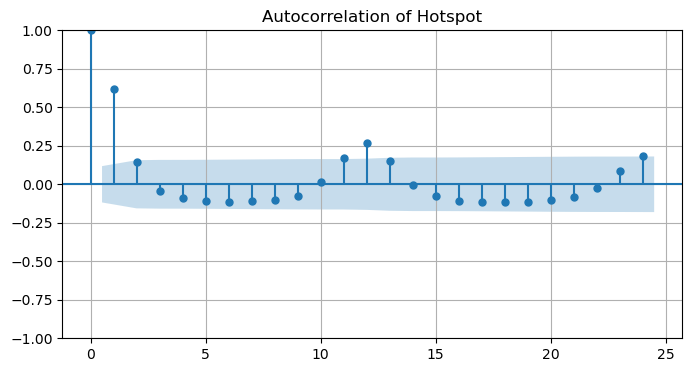

In [4]:
# membuat frame
fig, ax= plt.subplots(nrows=1, ncols=1, figsize = (8,4))

# hitung nilai acf
plot_acf(dataset["hotspot"], lags=24, ax=ax)

# membuat label-label
ax.set_title("Autocorrelation of Hotspot", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.show()

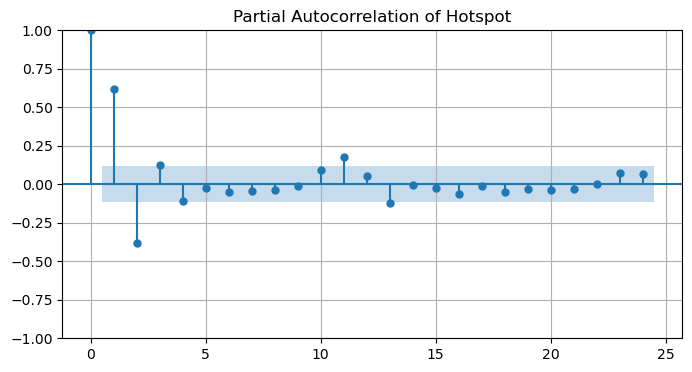

In [5]:
# membuat frame
fig, ax= plt.subplots(nrows=1, ncols=1, figsize = (8,4))

# hitung nilai acf
plot_pacf(dataset["hotspot"],lags=24, ax=ax, method="yw")

# membuat label-label
ax.set_title("Partial Autocorrelation of Hotspot", fontsize=12)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("", fontsize=12)
ax.grid(True)
plt.show()

1. ADF Test

In [6]:
adf = ADF(y=dataset["hotspot"], lags=1, trend="ct")
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -10.704
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [7]:
adf = ADF(y=dataset["hotspot"], lags=6, trend="ct")
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.721
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [8]:
adf = ADF(y=dataset["hotspot"], lags=12, trend="ct")
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.215
P-value                         0.004
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [9]:
adf = ADF(y=dataset["hotspot"], lags=24, trend="ct")
print(adf.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -3.252
P-value                         0.074
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.00 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


2. Phillips Perron

In [10]:
pp = PhillipsPerron(y=dataset["hotspot"], lags=1, trend="ct")
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -8.620
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [11]:
pp = PhillipsPerron(y=dataset["hotspot"], lags=6, trend="ct")
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -7.535
P-value                         0.000
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [12]:
pp = PhillipsPerron(y=dataset["hotspot"], lags=12, trend="ct")
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.892
P-value                         0.000
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [13]:
pp = PhillipsPerron(y=dataset["hotspot"], lags=24, trend="ct")
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -6.669
P-value                         0.000
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.99 (1%), -3.43 (5%), -3.14 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


- KPSS Test

In [14]:
kpss = KPSS(y=dataset["hotspot"], lags=1, trend="ct")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.095
P-value                         0.185
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [15]:
kpss = KPSS(y=dataset["hotspot"], lags=6, trend="ct")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.075
P-value                         0.304
Lags                                6
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [16]:
kpss = KPSS(y=dataset["hotspot"], lags=12, trend="ct")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.086
P-value                         0.232
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


In [17]:
kpss = KPSS(y=dataset["hotspot"], lags=24, trend="ct")
print(kpss.summary().as_text())

    KPSS Stationarity Test Results   
Test Statistic                  0.091
P-value                         0.201
Lags                               24
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
